In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

In [2]:
df = pd.read_csv("all_data.csv")
df.head(10)

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class
0,1867925250,902237363,0,52007310,16978,0,7197292,3968,1,682,...,59244345,7,0,49,26,46,23,23,23,normal
1,1994338334,903845459,0,52098054,16986,0,7227073,3968,1,682,...,59387381,7,0,49,26,46,23,23,23,normal
2,2116573334,905396546,0,52185853,16994,0,7255792,3969,1,682,...,59498140,7,0,49,26,46,23,23,23,normal
3,2257767832,907308930,0,52287097,17015,0,7291152,3975,1,701,...,59581345,7,0,51,27,47,23,24,24,normal
4,2342047724,908534112,0,52347521,17043,0,7313830,3977,1,709,...,59664453,7,0,51,27,47,23,24,24,normal
5,2424036838,909726952,0,52406325,17058,0,7335911,3977,1,709,...,59747510,7,0,51,27,47,23,24,24,normal
6,2497865923,910801444,0,52459278,17071,0,7355794,3978,1,709,...,59830667,7,0,51,27,47,23,24,24,normal
7,2571694555,911878558,0,52512248,17081,0,7375726,3978,1,709,...,59913622,7,0,51,27,47,23,24,24,normal
8,2645522529,912952156,0,52565214,17096,0,7395590,3978,1,709,...,59996537,7,0,51,27,47,23,24,24,normal
9,2719348243,914028958,0,52618180,17104,0,7415515,3978,1,709,...,60079648,7,0,51,27,47,23,24,24,normal


In [3]:
print(f"Total Observations (rows): {df.shape[0]}")
print(f"Total OID (columns): {df.shape[1]}")


Total Observations (rows): 4998
Total OID (columns): 35


In [4]:
print(df.dtypes)

ifInOctets11            int64
ifOutOctets11           int64
ifoutDiscards11         int64
ifInUcastPkts11         int64
ifInNUcastPkts11        int64
ifInDiscards11          int64
ifOutUcastPkts11        int64
ifOutNUcastPkts11       int64
tcpOutRsts              int64
tcpInSegs               int64
tcpOutSegs              int64
tcpPassiveOpens         int64
tcpRetransSegs          int64
tcpCurrEstab            int64
tcpEstabResets          int64
tcp?ActiveOpens         int64
udpInDatagrams          int64
udpOutDatagrams         int64
udpInErrors             int64
udpNoPorts              int64
ipInReceives            int64
ipInDelivers            int64
ipOutRequests           int64
ipOutDiscards           int64
ipInDiscards            int64
ipForwDatagrams         int64
ipOutNoRoutes           int64
ipInAddrErrors          int64
icmpInMsgs              int64
icmpInDestUnreachs      int64
icmpOutMsgs             int64
icmpOutDestUnreachs     int64
icmpInEchos             int64
icmpOutEch

In [5]:
#Check for Duplicate Values
if (len(df[df.duplicated()])>0):
    print("Duplicate values found in the data.")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate values detected in the data.")

No duplicate values detected in the data.


In [6]:
#Check null values
def checkNull():
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    print(missing)
checkNull()

Series([], dtype: int64)


In [7]:
colonnes_a_garder = [
    # Essentiels
    "ifInDiscards11", "ifoutDiscards11",
    "tcpRetransSegs", "tcpOutRsts", "tcpEstabResets",
    "udpInErrors", "udpNoPorts",
    "ipOutDiscards", "ipInDiscards", "ipOutNoRoutes", "ipInAddrErrors",
    "icmpInDestUnreachs", "icmpOutDestUnreachs",
    
    # Compléments
    "ifInOctets11", "ifOutOctets11",
    "tcpInSegs", "tcpOutSegs",
    "ipInReceives", "ipOutRequests",

    # Target
    "class"
]

# Filtrer les colonnes
df = df[colonnes_a_garder]


In [8]:
df.head(10)

,ifInDiscards11,ifoutDiscards11,tcpRetransSegs,tcpOutRsts,tcpEstabResets,udpInErrors,udpNoPorts,ipOutDiscards,ipInDiscards,ipOutNoRoutes,ipInAddrErrors,icmpInDestUnreachs,icmpOutDestUnreachs,ifInOctets11,ifOutOctets11,tcpInSegs,tcpOutSegs,ipInReceives,ipOutRequests,class
0,0,0,14,1,5,1,22,569,23,7,0,26,23,1867925250,902237363,682,537,59300887,187698,normal
1,0,0,14,1,5,1,22,569,23,7,0,26,23,1994338334,903845459,682,537,59444220,187952,normal
2,0,0,14,1,5,1,22,569,23,7,0,26,23,2116573334,905396546,682,537,59555619,188204,normal
3,0,0,14,1,5,1,22,569,23,7,0,27,23,2257767832,907308930,701,552,59638909,188475,normal
4,0,0,14,1,5,1,22,569,23,7,0,27,23,2342047724,908534112,709,558,59722075,188733,normal
5,0,0,14,1,5,1,22,569,23,7,0,27,23,2424036838,909726952,709,558,59805251,188985,normal
6,0,0,14,1,5,1,22,569,23,7,0,27,23,2497865923,910801444,709,558,59888440,189237,normal
7,0,0,14,1,5,1,22,569,23,7,0,27,23,2571694555,911878558,709,558,59971517,189489,normal
8,0,0,14,1,5,1,22,569,23,7,0,27,23,2645522529,912952156,709,558,60054480,189741,normal
9,0,0,14,1,5,1,22,569,23,7,0,27,23,2719348243,914028958,709,558,60137674,189993,normal


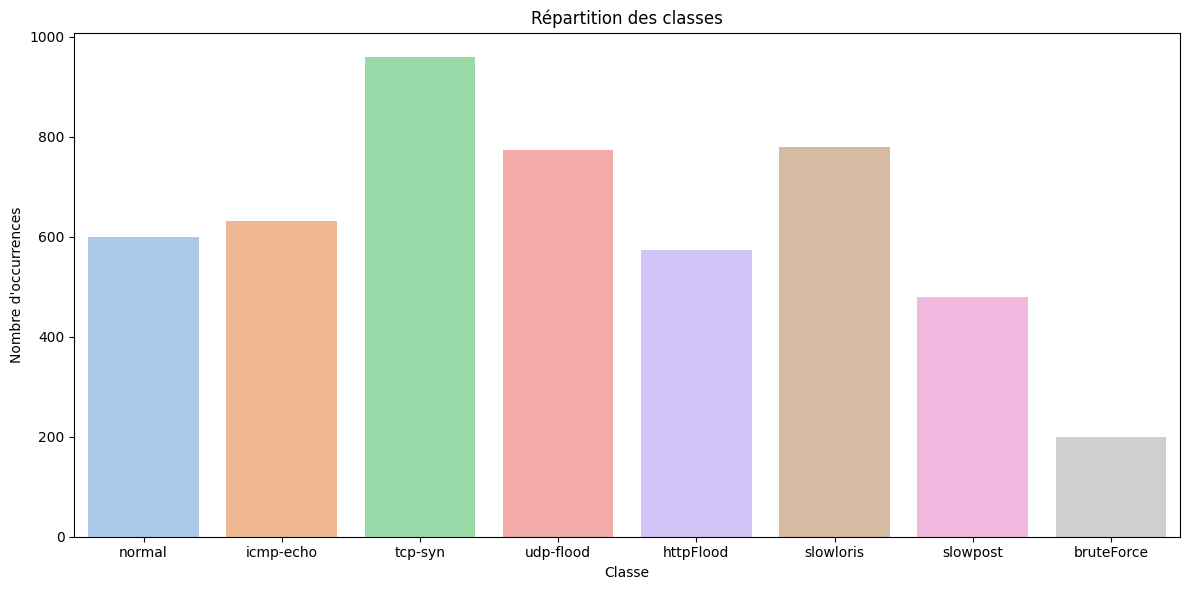

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="class", data=df, hue="class", palette="pastel", legend=False)

plt.title("Répartition des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.tight_layout()
plt.show()

In [10]:
print(df['class'].value_counts(normalize=True))

class
tcp-syn       0.192077
slowloris     0.156062
udp-flood     0.154662
icmp-echo     0.126451
normal        0.120048
httpFlood     0.114646
slowpost      0.096038
bruteForce    0.040016
Name: proportion, dtype: float64


In [11]:
quant_vars = [
    "ifInDiscards11", "ifoutDiscards11", "tcpRetransSegs", "tcpOutRsts", "tcpEstabResets",
    "udpInErrors", "udpNoPorts", "ipOutDiscards", "ipInDiscards", "ipOutNoRoutes",
    "ipInAddrErrors", "icmpInDestUnreachs", "icmpOutDestUnreachs", "ifInOctets11",
    "ifOutOctets11", "tcpInSegs", "tcpOutSegs", "ipInReceives", "ipOutRequests"
]

# Initialisation du scaler
scaler = MinMaxScaler()

# Normalisation des données
df[quant_vars] = scaler.fit_transform(df[quant_vars])

In [12]:
df.head(10)

,ifInDiscards11,ifoutDiscards11,tcpRetransSegs,tcpOutRsts,tcpEstabResets,udpInErrors,udpNoPorts,ipOutDiscards,ipInDiscards,ipOutNoRoutes,ipInAddrErrors,icmpInDestUnreachs,icmpOutDestUnreachs,ifInOctets11,ifOutOctets11,tcpInSegs,tcpOutSegs,ipInReceives,ipOutRequests,class
0,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.382353,1.0,0.434778,0.210083,0.331746,0.325676,0.173132,0.521742,normal
1,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.382353,1.0,0.464225,0.210458,0.331746,0.325676,0.173558,0.522453,normal
2,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.382353,1.0,0.492698,0.210819,0.331746,0.325676,0.173888,0.523159,normal
3,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.525587,0.211264,0.341799,0.335811,0.174136,0.523918,normal
4,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.545219,0.211550,0.346032,0.339865,0.174383,0.524641,normal
5,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.564318,0.211827,0.346032,0.339865,0.174630,0.525346,normal
6,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.581515,0.212078,0.346032,0.339865,0.174877,0.526052,normal
7,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.598713,0.212328,0.346032,0.339865,0.175123,0.526758,normal
8,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.615910,0.212578,0.346032,0.339865,0.175370,0.527464,normal
9,0.0,0.0,0.583333,0.0,0.5,0.030303,0.580645,0.44168,0.285714,1.0,0.0,0.397059,1.0,0.633107,0.212829,0.346032,0.339865,0.175617,0.528169,normal


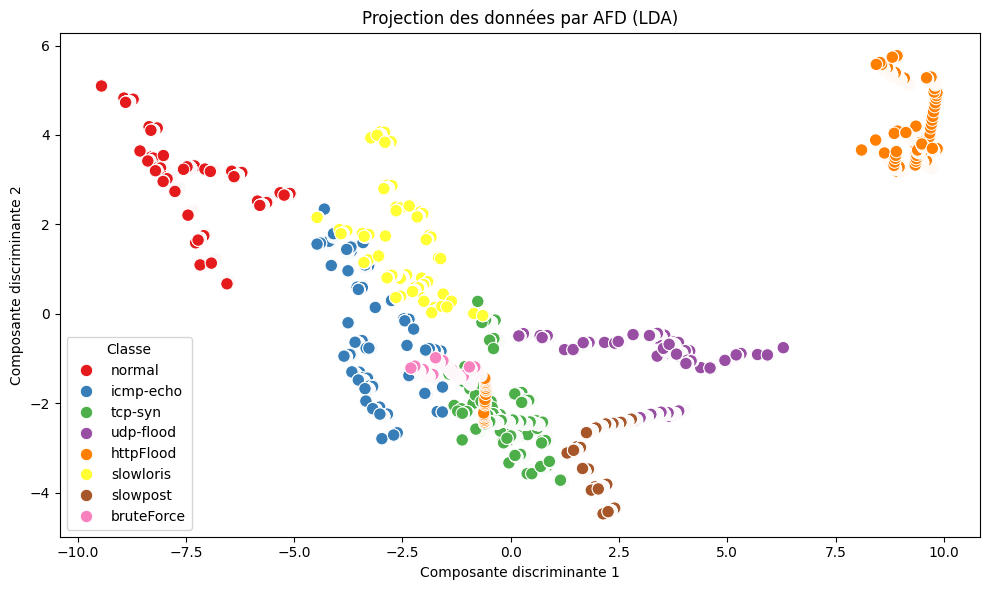

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Séparation X / y
X = df.drop("class", axis=1)
y = df["class"]

# Application de LDA pour réduction à 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Créer un DataFrame pour visualiser
lda_df = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
lda_df["class"] = y.values

# Affichage du nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="class", palette="Set1", s=80)
plt.title("Projection des données par AFD (LDA)")
plt.xlabel("Composante discriminante 1")
plt.ylabel("Composante discriminante 2")
plt.legend(title="Classe")
plt.tight_layout()
plt.show()


In [14]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("y_pred : ", y_pred[:20])
print("y_test : ", y_test[:20])

Accuracy: 0.997
y_pred :  [3 7 7 0 0 5 3 2 5 2 4 1 7 4 2 3 2 4 0 4]
y_test :  [3 7 7 0 0 5 3 2 5 2 4 1 7 4 2 3 2 4 0 4]


In [15]:
joblib.dump(knn, "knn_model.pkl")
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [16]:
print(le.classes_)


['bruteForce' 'httpFlood' 'icmp-echo' 'normal' 'slowloris' 'slowpost'
 'tcp-syn' 'udp-flood']
